In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [6]:
boston=load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [15]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [22]:
df_target=pd.DataFrame(boston.target,columns=["MEDV"])
df_target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [23]:
df_full=pd.concat([df,df_target],axis=1)
df_full.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Шаг 1. Строим самую простую модель

In [24]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=1)

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train, y_train)

sc_train = knn.score(X_train , y_train)
sc_test = knn.score(X_test , y_test)


print("тренировочный: {:.3f}".format(sc_train))
print("тестовый: {:.3f}".format(sc_test))

тренировочный: 0.716
тестовый: 0.585


## Шаг 2. Проводим препроцессинг (пересмасштабирование) данных

In [25]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=1)

scaler = MinMaxScaler() 
# находим функцию масштабирования
scaler.fit(X_train) # Перемасштабирование ТОЛЬКО на ТРЕНИРОВОЦНОМ наборе,  


X_train_scaled = scaler.transform(X_train) # перемасштабировали тренировочный набор
X_test_scaled = scaler.transform(X_test)   # перемасштабировали тестовый набор


knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

sc_train = knn.score(X_train_scaled , y_train)
sc_test =  knn.score(X_test_scaled ,  y_test)

print("тренировочный: {:.3f}".format(sc_train))
print("тестовый: {:.3f}".format(sc_test))

тренировочный: 0.841
тестовый: 0.781


## Шаг 2.5 Посмотрим метрики результатов
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [26]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=1)

scaler = MinMaxScaler() 
# находим функцию масштабирования
scaler.fit(X_train) # Перемасштабирование ТОЛЬКО на ТРЕНИРОВОЦНОМ наборе,  

X_train_scaled = scaler.transform(X_train) # перемасштабировали тренировочный набор
X_test_scaled = scaler.transform(X_test)   # перемасштабировали тестовый набор

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

# предскажем значение тренировочный и тестовых y
y_pred_train=knn.predict(X_train_scaled)
y_pred=knn.predict(X_test_scaled)

# Проверим тренировочный набор (не всегда нужно делать)
print('тренировочный R^2: {:.3f}'.format( r2_score(y_train,y_pred_train) ) )
# MSE само по себе мало значит, но важно при сравнении дрс другими результатами 
print('тренировочный MSE: {:.3f}'.format( mean_squared_error(y_train,y_pred_train) ) ) 

# Проверим тренировочный набор (не всегда нужно делать)
print('тестовый R^2: {:.3f}'.format( r2_score(y_test,y_pred) ) )
# MSE само по себе мало значит, но важно при сравнении дрс другими результатами 
print('тестовый MSE: {:.3f}'.format( mean_squared_error(y_test,y_pred) ) ) 


тренировочный R^2: 0.841
тренировочный MSE: 12.637
тестовый R^2: 0.781
тестовый MSE: 21.691


## Шаг 3. Добавим поиск оптимального параметра

[1.    0.908 0.873 0.841 0.8   0.761 0.734 0.723 0.708]
[0.755 0.801 0.806 0.781 0.771 0.748 0.729 0.718 0.706]
[24.263 19.752 19.195 21.691 22.728 25.009 26.812 27.906 29.131]


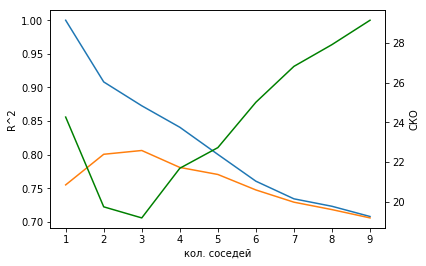

In [27]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=1) # 1, 12, 100

scaler = MinMaxScaler() 
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

sc_train=[]
sc_test=[]
sc_train_mse=[]
sc_test_mse=[]

ran=range(1,10)

for r in ran:
    knn = KNeighborsRegressor(n_neighbors=r)
    knn.fit(X_train_scaled, y_train)
    sc_train=np.append(sc_train,knn.score(X_train_scaled ,y_train))
    sc_test=np.append(sc_test, knn.score(X_test_scaled ,y_test)) 
    y_pred=knn.predict(X_test_scaled)
    sc_test_mse=np.append(sc_test_mse,  mean_squared_error (y_test, y_pred)   )
    
np.set_printoptions(precision=3)
print(sc_train)
print(sc_test)
print(sc_test_mse)

fig, ax1 = plt.subplots()
ax1.plot(ran,sc_train,ran,sc_test)
ax1.set_xlabel('кол. соседей')
ax1.set_ylabel('R^2')
ax2 = ax1.twinx()
ax2.plot(ran,sc_test_mse,'-g')
ax2.set_ylabel('СКО') #  СКО - среднеквадрат ошибка  или MSE - mean squared error
plt.show()

## Итоговый шаг. Строим коннтейнеры

In [28]:
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=12, test_size=0.2)

kfold = KFold(n_splits=10, shuffle=True, random_state=1)

pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsRegressor())])

n_neighbors=[1, 2, 3, 4, 5]
p=[1, 2, 3, 4, 6, 8, 10]
weights=['uniform','distance']

param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()], 
     'classifier': [KNeighborsRegressor()],
     'classifier__n_neighbors': n_neighbors,
     'classifier__p': p,
     'classifier__weights': weights
     }
]

grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, iid=True)
grid.fit(X_train,y_train)

print("----------------- Обучили и тестировали -------------------")
print("Наилучшие параметры:\n{}\n".format(grid.best_params_))
print("Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: {:.6f}\n".format(grid.best_score_)) 
print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(grid.score(X_test, y_test)))
gridresults = pd.DataFrame(grid.cv_results_)
display(gridresults.sort_values(["rank_test_score"]).T)

----------------- Обучили и тестировали -------------------
Наилучшие параметры:
{'classifier': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=4, p=1,
          weights='distance'), 'classifier__n_neighbors': 4, 'classifier__p': 1, 'classifier__weights': 'distance', 'preprocessing': RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)}

Средняя правильность для наилучшей модели кроссвалидации на валидационных тестовых наборах: 0.784266

Правильность для наилучшей модели на тестовом наборе: 0.848867



,131,173,88,130,172,128,94,184,85,89,...,26,14,17,74,8,11,32,35,41,38
mean_fit_time,0.00196815,0.00208158,0.000740266,0.000588655,0.000590062,0.00201912,0.000609732,0.000688863,0.00058279,0.00204144,...,0.00201297,0.00225921,0.00219688,0.00199494,0.00280342,0.00200205,0.00225499,0.00214121,0.00213737,0.00258553
std_fit_time,5.83304e-05,0.000167312,0.00018912,2.75783e-06,3.26459e-06,3.98949e-05,3.67845e-06,0.000150266,9.18651e-06,3.33948e-05,...,0.000143765,0.000289913,0.00010394,4.24704e-05,0.000568398,3.56545e-05,0.000291457,0.000245023,5.41665e-05,0.000706506
mean_score_time,0.000679135,0.0007617,0.000841022,0.000698972,0.000699353,0.000662184,0.000665331,0.00481269,0.000626063,0.000690913,...,0.00318239,0.00369129,0.00358372,0.00357344,0.000872564,0.000628138,0.00368574,0.00344589,0.00336626,0.00366466
std_score_time,2.30434e-05,0.000138276,0.0002719,2.15826e-05,8.57846e-06,1.74311e-05,6.67248e-06,0.000421266,9.12956e-06,1.35859e-05,...,0.000478778,0.000620138,0.000489541,0.000534298,0.000258723,1.28207e-05,0.000897327,0.000553699,0.000459874,0.000620307
param_classifier,"KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...",...,"KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz...","KNeighborsRegressor(algorithm='auto', leaf_siz..."
param_classifier__n_neighbors,4,5,3,4,5,4,3,5,3,3,...,1,1,1,2,1,1,1,1,1,1
param_classifier__p,1,1,1,1,1,1,2,3,1,1,...,6,3,3,8,2,2,8,8,10,10
param_classifier__weights,distance,distance,distance,distance,distance,uniform,distance,distance,uniform,distance,...,uniform,uniform,distance,uniform,uniform,distance,uniform,distance,distance,uniform
param_preprocessing,"RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","RobustScaler(copy=True, quantile_range=(25.0, ...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","StandardScaler(copy=True, with_mean=True, with...","RobustScaler(copy=True, quantile_range=(25.0, ...",...,"RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ..."
params,{'classifier': KNeighborsRegressor(algorithm='...,{'classifier': KNeighborsRegressor(algorithm='...,{'classifier': KNeighborsRegressor(algorithm='...,{'classifier': KNeighborsRegressor(algorithm='...,{'classifier': KNeighborsRegressor(algorithm='...,{'classifier': KNeighborsRegressor(algorithm='...,{'classifier': KNeighborsRegressor(algorithm='...,{'classifier': KNeighborsRegressor(algorithm='...,{'classifier': KNeighborsRegressor(algorithm='...,{'